# Artificial Neural Network (ANN) for Customer Classification

Here Artificial Neural Network (ANN) is utilized to predict whether or not an applicant will be able to repay a loan. The historical loan application data from Lending Club Loans are used to train the ANN. 

This is a supervised classification task in which, The labels are included in the training data and the model will be trained to predict the labels from the features. 

The label is a binary variable and describe the following situations:
- 0: Customer will repay loan on time
- 1: Customer Default (difficulty repaying loan)

Performances of ANN network was investigated using multiple accuracy metrics including precision, recall and ROC curves. A grid search was used to optimize activation kernel and also hyper parameters including dropout rate and weight constrain.




## Company Information
LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.


## The Data

There are many LendingClub data sets on Kaggl. We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

Exploratory Analysis of above dataset to identify correlation between feature variables followed by handling missing data and categorical variables are explained in my previous project titled [Comprehensive Evaluation of Machine Learning Techniques to Predict Customer Default](https://github.com/majid-hosseini/Machine-Learning-Techniques-to-Predict-Customer-Default).

The final processed data file is used here and a copy of it is copied in dataset folder of this project.




## List of Sections
[Section 1: Loading the data](#Section-1:-Loading-data)

[Section 2: Train Test Split and Normalizing Data](#Section-2:-Train-Test-Split-and-Normalizing-Data)

[Section 3: A Review of Accuracy Metrics](#Section-3:-A-Review-of-Accuracy-Metrics)

[Section 4: Creating the Model](#Section-4:-Creating-the-Model)

[Section 5: Evaluating Model Performance](#Section-5:-Evaluating-Model-Performance)

[Section 6: Adding Dropout](#Section-6:-Adding-Dropout)

[Section 7: Adding Class Weight](#Section-7:-Adding-Class_Weight)

[Section 8: Influence of Activation Kernel](#Section-8:-Influence-of-Activation-Kernel)

[Section 9: Model Optimization](#Section-9:-Model-Optimization)

[Section 10: Comparison with Previously Investigated Classifier](#Section-10:-Comparison-with-Previously-Investigated-Classifier)





## Import necessary libraries.

In [1]:
# import pandas for data (csv) manipulation
import pandas as pd

# import numpy for math calculations
import numpy as np

# import matplotlib for plotting
import matplotlib.pyplot as plt

# import seaborn for more plotting options(built on top of matplotlib)
import seaborn as sns

# display plots on the notebook itself
%matplotlib inline

plt.style.use('ggplot') 

# Supress unnecessary warnings so that the presentation looks clean
import warnings
warnings.filterwarnings("ignore")

<a name="Section-1:-Exploratory-Data-Analysis"></a>
# Section 1: Loading the data

The final proccessed data file from my previous project is loaded here from dataset folder. Please refer to the following link for a full description of exploratory data analysis, investigation of feature correlations, handeling of missing data and categorical variables:

[Comprehensive Evaluation of Machine Learning Techniques to Predict Customer Default](https://github.com/majid-hosseini/Machine-Learning-Techniques-to-Predict-Customer-Default)


In [2]:
df = pd.read_csv('dataset/modified_lending_club_dataset.csv')

Let's review the statistic:

In [3]:
df.describe()

,loan_amnt,term,int_rate,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,...,05113,11650,22690,29597,30723,48052,70466,86630,93700,earliest_cr_year
count,395219.000000,395219.000000,395219.000000,3.952190e+05,395219.000000,395219.000000,395219.000000,3.952190e+05,395219.000000,395219.000000,...,395219.000000,395219.000000,395219.000000,395219.000000,395219.000000,395219.000000,395219.000000,395219.000000,395219.000000,395219.000000
mean,14122.061250,41.706527,13.642094,7.419937e+04,17.390758,11.318494,0.178481,1.585165e+04,53.808764,25.426505,...,0.114620,0.028364,0.142739,0.114855,0.142711,0.141215,0.143920,0.027729,0.028151,1997.861636
std,8357.054944,10.217263,4.472944,6.155725e+04,18.032696,5.134901,0.531098,2.058427e+04,24.440088,11.885322,...,0.318563,0.166011,0.349807,0.318848,0.349778,0.348244,0.351009,0.164195,0.165406,7.199028
min,500.000000,36.000000,5.320000,0.000000e+00,0.000000,1.000000,0.000000,0.000000e+00,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1944.000000
25%,8000.000000,36.000000,10.490000,4.500000e+04,11.300000,8.000000,0.000000,6.038000e+03,35.900000,17.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1994.000000
50%,12000.000000,36.000000,13.330000,6.400000e+04,16.920000,10.000000,0.000000,1.119000e+04,54.800000,24.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1999.000000
75%,20000.000000,36.000000,16.550000,9.000000e+04,22.990000,14.000000,0.000000,1.962600e+04,72.900000,32.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2003.000000
max,40000.000000,60.000000,30.990000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2013.000000


<a name="Section-2:-Train-Test-Split-and-Normalizing-Data"></a>
# Section 2: Train Test Split and Normalizing Data


### OPTIONAL (Grabbing a Sample for Training Time)
OPTIONAL: Use .sample() to grab a sample of the 490k+ entries to save time on training. Highly recommended for lower RAM computers or if you are not using GPU.


In [4]:
print('length of original dataset = ',len(df))
df_samples = df.sample(frac=0.1,random_state=101)
print('length of sampled dataset = ',len(df_samples))

length of original dataset =  395219
length of sampled dataset =  39522


### Train Test Split

In [5]:
from sklearn.model_selection import train_test_split

**Seting X and y variables to the values of the features and label.**

In [6]:
X_original = df.drop('consumer_default',axis=1).values
y_original = df['consumer_default'].values

In [7]:
X = df_samples.drop('consumer_default',axis=1).values
y = df_samples['consumer_default'].values

In [8]:
class_names = ['Fully Paid', 'Consumer Default']
features = list(set(df.columns).difference({'consumer_default'}))

**Perform a train/test split with test_size=0.2 and a random_state of 101.**

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=101)

Fraction of each class in train and test datasets

In [10]:
# show the distribution
print('y_train class distribution')
print(pd.Series(y_train).value_counts(normalize=True))
print('y_test class distribution')
print(pd.Series(y_test).value_counts(normalize=True))


y_train class distribution
0    0.801183
1    0.198817
dtype: float64
y_test class distribution
0    0.801139
1    0.198861
dtype: float64


### Normalizing the Data

**Use a MinMaxScaler to normalize the feature data X_train and X_test. Recall we don't want data leakge from the test set so we only fit on the X_train data.**

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler()

In [13]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Analyze class imbalance in the targets


In [14]:
counts = np.bincount(y_train)
print(
    "Number of positive samples in training data: {} ({:.2f}% of total)".format(
        counts[1], 100 * float(counts[1]) / len(y_train)
    )
)

weight_for_0 = 1.0 / counts[0]
weight_for_1 = 1.0 / counts[1]

Number of positive samples in training data: 6286 (19.88% of total)


**Since we are dealing with an imbalance dataset, we can not rely only on the accuracy to evaluate model performance. Following is a review of the accuracy metrics that will be used in this project.**

<a name="Section-3:-A-Review-of-Accuracy-Metrics"></a>
# Section 3: A Review of Accuracy Metrics


<b>1.True Positives (TP):</b> True positives are the cases when an actual class of 1(True) is successfully predicted as class 1(True). e.g. the model classify a cencer case when the person is actually having cancer.

<b>2.True Negatives (TN):</b> True negatives are the cases when an actual class of 0(False) is successfully predicted as class 0(False). e.g. a person NOT having cancer and is classified as Not cancer by the model.

<b>3.False Positives (FP):</b> False positives are the cases when the actual class of the data point is 0(False) and the model incorretly predicted the case as 1(True). e.g. a person NOT having cancer is incorrectly classified as a case with cancer by the model.

<b>4.False Negatives (FN):</b> False Negatives are the cases when the actual class of the data point is 1(True) and the model incorretly predicted the case as 0(False). e.g. a person having cancer is incorrectly classified as a case with No-cancer by the model.



### Accuracy:
Accuracy in classification problems is the number of correct predictions made by the model divided by all predictions made.
**Accuracy= (TP + TN) / (P + N)** 
![accuracy.png](images/accuracy.png)

### Precision:
Precision pertains to how precise/accurate the model is, and describes out of those predicted positive, how many of them are actual positive.
**Precision= TP / (TP + FP)** 
![precision.png](images/precision.png)

### Recall - True Positive Rate:
The value of recall explains the percent of the positive cases that are catched by the model (predicted positive) amongst all positive cases. In other words, recall is fraction of captured Actual Positives by the model through labeling them as Positive.
**Recall= TP / (TP+FN)** 
![recall.png](images/recall.png)

### False Positive Rate:
<b>False Positive Rate = False Positives / (False Positives + True Negatives) </b>


### F-1 Score:
The F1 score (also F-score or F-measure) is the harmonic mean of the precision and recall. The F-score can be any number in the range of 1.0 (indicating perfect precision and recall) and 0.0 (if either the precision or the recall is zero). 

**F1-score = (Recall* Precision) / (Recall+Precision)*0.5**  

![f-1%20score.png](images/f-1%20score.png)

### ROC (receiver operating characteristic) Curve:
A curve of true positive rate vs. false positive rate at different classification thresholds which is a plot of the false alarm rate versus the hit rate.

### AUROC (Area under ROC):
AUROC stands for "Area under the ROC Curve" and measures the entire two-dimensional area underneath the entire ROC curve considering all possible classification thresholds. The Area Under the ROC curve is the probability that the model is doing better than a random classifier.


image source : https://medium.com/greyatom/performance-metrics-for-classification-problems-in-machine-learning-part-i-b085d432082b

<a name="Section-4:-Creating-the-Model"></a>
# Section 4: Creating the Model



Let's import the necessary Keras functions.

In [15]:
import tensorflow as tf
from tensorflow import keras
from keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

**A sequential model will be built and trained on the data. There are unlimited options here, but here is what the solution uses: a model that goes 256 --> 128 --> 64--> 1 output neuron and relu activation kernel function is used as default.**

In [16]:
model = Sequential()

# input layer
model.add(Dense(256, activation='relu'))

# hidden layer
model.add(Dense(128, activation='relu'))

# hidden layer
model.add(Dense(64, activation='relu'))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

The precision, recall and AUC added to the model.compile.

In [17]:
perfromance_metrics = [
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
    keras.metrics.AUC(name="AUC"),
]

# Compile model
model.compile(
    optimizer=keras.optimizers.Adam(1e-2), loss="binary_crossentropy", metrics=perfromance_metrics
)


**Fiting the model to the training data for at least 25 epochs. Also the validation data was added for later plotting.**

In [18]:
model.fit(
    x=X_train,
    y=y_train,
    batch_size=256,
    epochs=40,
    verbose=0,
    validation_data=(X_test, y_test),
)

<a name="Section-5:-Evaluating-Model-Performance"></a>
# Section 5: Evaluating Model Performance




Let's defined some helper functions for plotting purpose and model performance evaluations:

In [19]:
def plot_results(losses):
    '''
    plot the curve of loss, AUC, recall and precision from the input DataFrame to compare validation versus training   
    '''
    
    fig, axs = plt.subplots(2,2, figsize=(12,8))
    
    # "Loss"
    axs[0,0].plot(losses['loss'], "b-", label="Training Loss")
    axs[0,0].plot(losses['val_loss'], "r--", label="Test Loss")
    axs[0,0].legend(loc='best')
    axs[0,0].set_title('Model Loss')
    axs[0,0].set(xlabel='Epoch')
    axs[0,0].set(ylabel='Loss')
    
    # "AUC"
    axs[0,1].plot(losses['AUC'], "b-", label="Training AUC")
    axs[0,1].plot(losses['val_AUC'], "r--", label="Test AUC")
    axs[0,1].legend(loc='best')
    axs[0,1].set_title('Model AUC')
    axs[0,1].set(xlabel='Epoch')
    axs[0,1].set(ylabel='AUC')
    
    # "Recall"
    axs[1,0].plot(losses['recall'], "b-", label="Training Recall")
    axs[1,0].plot(losses['val_recall'], "r--", label="Test Recall")
    axs[1,0].legend(loc='best')
    axs[1,0].set_title('Model Recall')
    axs[1,0].set(xlabel='Epoch')
    axs[1,0].set(ylabel='Recall')
    
    # "Precision"
    axs[1,1].plot(losses['precision'], "b-", label="Training Precision")
    axs[1,1].plot(losses['val_precision'], "r--", label="Test Precision")
    axs[1,1].legend(loc='best')
    axs[1,1].set_title('Model Precision')
    axs[1,1].set(xlabel='Epoch')
    axs[1,1].set(ylabel='Precision')
    
    plt.tight_layout()


Following helper functions output model evaluations metrics and confusion matrix in both tabuar format and graphic tile format

In [20]:
import sklearn.metrics as metrics
from sklearn.metrics import ConfusionMatrixDisplay
from IPython.display import display, HTML
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, f1_score, confusion_matrix

def metric_report_to_df(ytrue, ypred):
    """
    format classifier accuracy metrics to a pandas dataframe for printing purposes.
    
    """
    
    precision, recall, fscore, support = metrics.precision_recall_fscore_support(ytrue, ypred, zero_division=1)
    classification_report = pd.concat(map(pd.DataFrame, [precision, recall, fscore, support]), axis=1)
    classification_report.index = class_names
    classification_report.columns = ["precision", "recall", "f1-score", "support"] # Add row w "avg/total"
    classification_report.loc['avg/Total', :] = metrics.precision_recall_fscore_support(ytrue, ypred, average='weighted', zero_division=1)
    classification_report.loc['avg/Total', 'support'] = classification_report['support'].sum() 
    return(classification_report)

def model_report(model_name, y_test, predictions):
    """
    printing confusion matrix in a nice table format.
    
    """
    cm = metrics.confusion_matrix(y_test, predictions)
    confusion_tabular = pd.DataFrame(cm)
    confusion_tabular.columns = ['      Predcited: No ', '      Predcited: Yes']
    confusion_tabular.index = ['Actual: No', 'Actual: Yes']
    confusion_tabular.iloc[0,0] = "TN = " + str(confusion_tabular.iloc[0,0])
    confusion_tabular.iloc[0,1] = "FP = " + str(confusion_tabular.iloc[0,1])
    confusion_tabular.iloc[1,0] = "FN = " + str(confusion_tabular.iloc[1,0])
    confusion_tabular.iloc[1,1] = "TP = " + str(confusion_tabular.iloc[1,1])
    print("\n")
    print (" Consumer Default Prediction using " + model_name + "\n")
    display(HTML(confusion_tabular.to_html()))

    classification_report = metric_report_to_df(y_test, predictions)
    display(HTML(classification_report.to_html()))
    print("")

def tile_plot_confusion_matrix(y_test, predictions, class_names):
    """
    printing confusion matrix in graphic tile format.
    
    """
    cm = confusion_matrix(y_test, predictions, normalize='true')
    #disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp = ConfusionMatrixDisplay(cm, class_names)
    disp.plot(cmap=plt.cm.Blues)
    return plt.show()

**The values of loss and the defined metrics are saved as a DataFrame to be plotted later for a caomparison of the validation versus the training.**

In [21]:
def model_output(model_name='Deep Learning Classifier'):
    '''
    print the evaulation metric results and plot the curves
    '''
    predictions = model.predict_classes(X_test)
    model_report(model_name, y_test, predictions)
    tile_plot_confusion_matrix(y_test, predictions, class_names)

**Let's investigate the model performance using the helper functions**

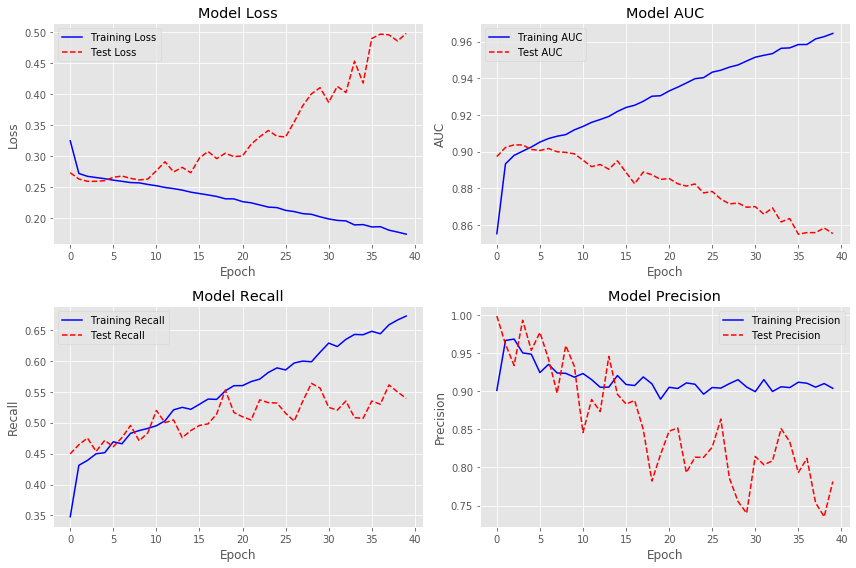

In [22]:
losses = pd.DataFrame(model.history.history)
plot_results(losses)



 Consumer Default Prediction using Deep Learning Classifier



,Predcited: No,Predcited: Yes
Actual: No,TN = 6096,FP = 237
Actual: Yes,FN = 724,TP = 848


,precision,recall,f1-score,support
Fully Paid,0.893842,0.962577,0.926937,6333.0
Consumer Default,0.781567,0.539440,0.638314,1572.0
avg/Total,0.871515,0.878431,0.869541,7905.0


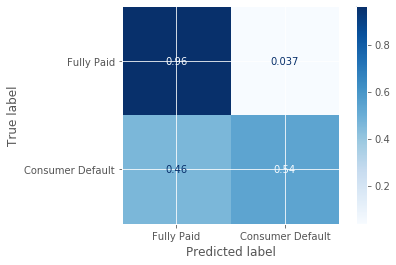

In [23]:
model_output('Deep Learning Classifier')

The comparison of test vs training curves are indicating a clear overfitting behavior

<a name="Section-6:-Adding-Dropout"></a>
# Section 6: Adding Dropout

A dropout with fraction of 0.2 is added to all layers of the model to metigate the overfitting behavior:


In [24]:
model = Sequential()

# input layer
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

# hidden layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

# hidden layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

Compile and Fit the new model to the data for tarining:

In [25]:
# Compile model
model.compile(
    optimizer=keras.optimizers.Adam(1e-2), loss="binary_crossentropy", metrics=perfromance_metrics
)

model.fit(
    x=X_train,
    y=y_train,
    batch_size=256,
    epochs=40,
    verbose=0,
    validation_data=(X_test, y_test),
)

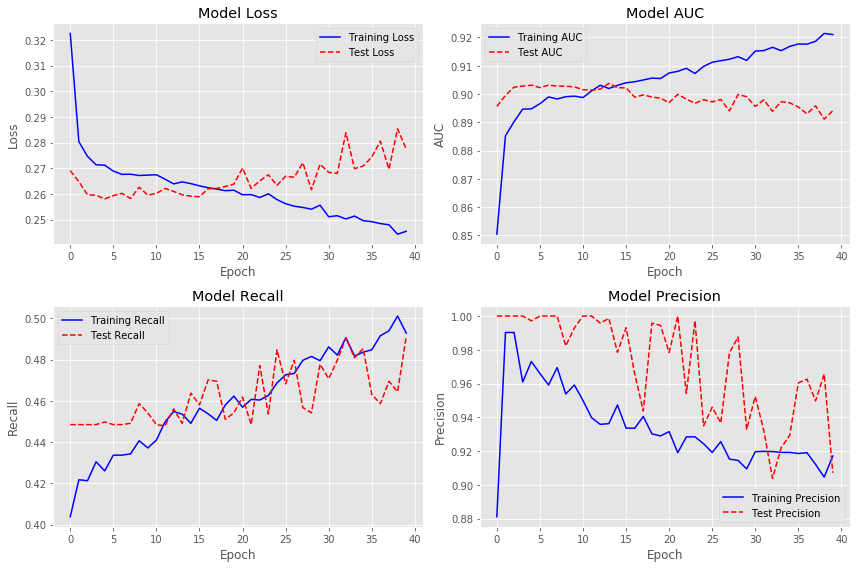

In [26]:
losses = pd.DataFrame(model.history.history)
plot_results(losses)



 Consumer Default Prediction using Deep Learning Classifier with Droptout



,Predcited: No,Predcited: Yes
Actual: No,TN = 6254,FP = 79
Actual: Yes,FN = 800,TP = 772


,precision,recall,f1-score,support
Fully Paid,0.886589,0.987526,0.934339,6333.0
Consumer Default,0.907168,0.491094,0.637227,1572.0
avg/Total,0.890682,0.888805,0.875255,7905.0


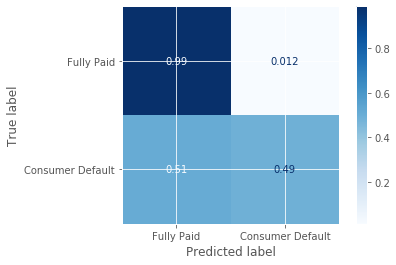

In [27]:
model_output('Deep Learning Classifier with Droptout')

Adding dropout layer substantially reduced the overfitting behavior of the model. However, The high precision and low recall which most probably caused by imbalanced dataset needs to be addressed.

<a name="Section-7:-Adding-Class_Weight"></a>
# Section 7: Adding Class Weight

A class weight is added to deal with our imbalance dataset and compensate for the lower presence of the class_1 (Defaulted customers).

In [28]:
class_weight = {0: weight_for_0, 1: weight_for_1}

In [29]:
model.fit(
    x=X_train,
    y=y_train,
    batch_size=256,
    epochs=25,
    verbose=0,
    validation_data=(X_test, y_test),
    class_weight=class_weight,
)

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.


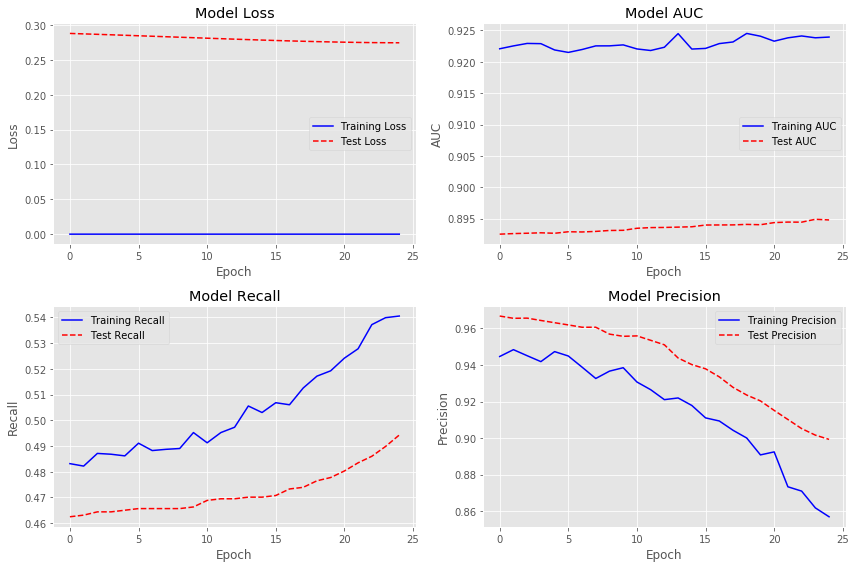

In [30]:
losses = pd.DataFrame(model.history.history)
plot_results(losses)



 Consumer Default Prediction using Deep Learning Classifier with Droptout and Class_weight



,Predcited: No,Predcited: Yes
Actual: No,TN = 6246,FP = 87
Actual: Yes,FN = 795,TP = 777


,precision,recall,f1-score,support
Fully Paid,0.887090,0.986262,0.934051,6333.0
Consumer Default,0.899306,0.494275,0.637931,1572.0
avg/Total,0.889519,0.888425,0.875164,7905.0


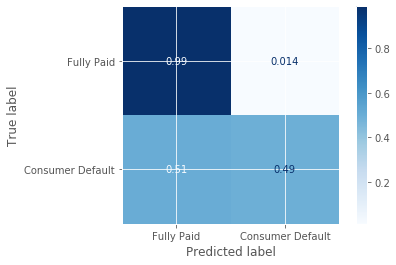

In [31]:
model_output('Deep Learning Classifier with Droptout and Class_weight')

The model perfromance indicate a substantial improvement compre to the previous cases. The recall and precision curve indicate that the model still needs further iterations for a full convergence. So, the number of epochs was increaded to 60 for a rerun of model.

In [32]:
model.fit(
    x=X_train,
    y=y_train,
    batch_size=256,
    epochs=80,
    verbose=0,
    validation_data=(X_test, y_test),
    class_weight=class_weight,
)

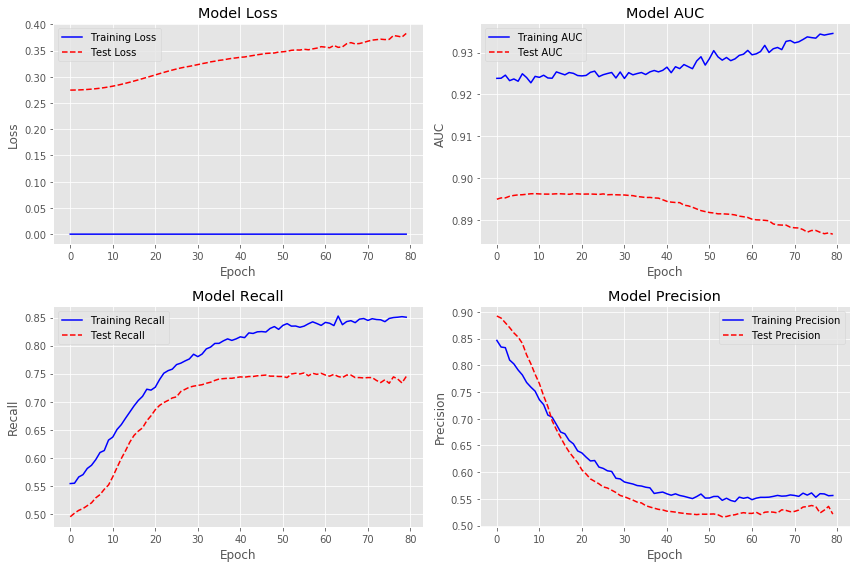

In [33]:
losses = pd.DataFrame(model.history.history)
plot_results(losses)




 Consumer Default Prediction using Deep Learning Classifier with Droptout and Class_weight



,Predcited: No,Predcited: Yes
Actual: No,TN = 5259,FP = 1074
Actual: Yes,FN = 401,TP = 1171


,precision,recall,f1-score,support
Fully Paid,0.929152,0.830412,0.877012,6333.0
Consumer Default,0.521604,0.744911,0.613571,1572.0
avg/Total,0.848106,0.813409,0.824623,7905.0


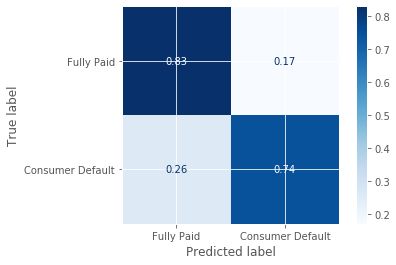

In [34]:
model_output('Deep Learning Classifier with Droptout and Class_weight')

<a name="Section-7:-Influence-of-Activation Kernel"></a>
# Section 7: Influence of Activation-Kernel

A different choice of activation kernel is tested here ti investigate its influence on model perfromance

In [35]:
model = Sequential()

# input layer
model.add(Dense(256, activation='tanh'))
model.add(Dropout(0.3))

# hidden layer
model.add(Dense(128, activation='tanh'))
model.add(Dropout(0.3))

# hidden layer
model.add(Dense(64, activation='tanh'))
model.add(Dropout(0.3))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

In [36]:
# Compile model
model.compile(
    optimizer=keras.optimizers.Adam(1e-2), loss="binary_crossentropy", metrics=perfromance_metrics
)

model.fit(
    x=X_train,
    y=y_train,
    batch_size=256,
    epochs=30,
    verbose=0,
    validation_data=(X_test, y_test),
    class_weight=class_weight,
)

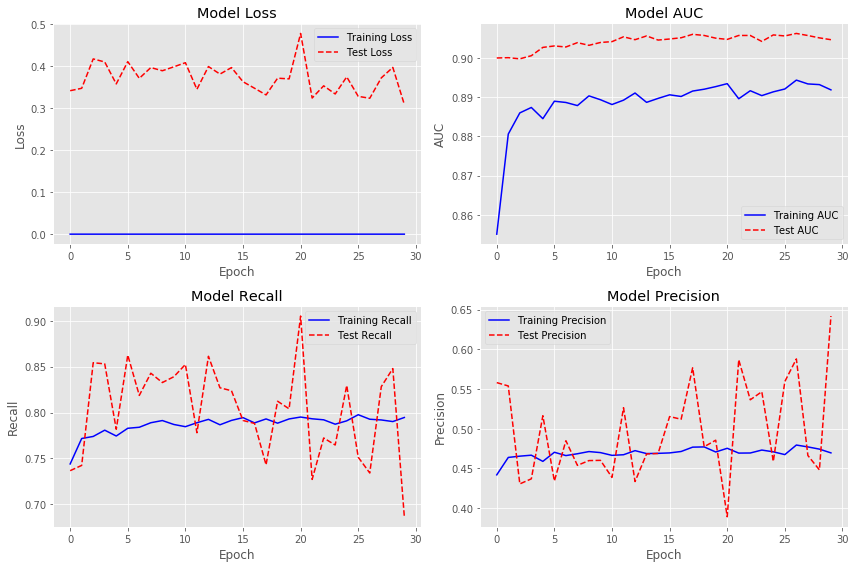

In [37]:
losses = pd.DataFrame(model.history.history)
plot_results(losses)



 Consumer Default Prediction using Deep Learning Classifier with Droptout and Class_weight and tanh_activation_kernel



,Predcited: No,Predcited: Yes
Actual: No,TN = 5731,FP = 602
Actual: Yes,FN = 493,TP = 1079


,precision,recall,f1-score,support
Fully Paid,0.920790,0.904942,0.912798,6333.0
Consumer Default,0.641880,0.686387,0.663388,1572.0
avg/Total,0.865326,0.861480,0.863200,7905.0


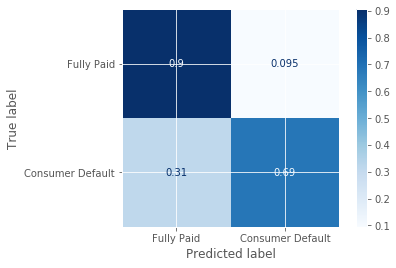

In [38]:
model_output('Deep Learning Classifier with Droptout and Class_weight and tanh_activation_kernel')

A precision-recall curve focuses on the performance of a classifier on the positive class only. Precision describes how good a model is at predicting the positive clas where Recall is the hit rate of the model. Recall is the same as sensitivity.

A precision-recall curve is plotted by calculating the precision and recall for each threshold. We use the grid_search_ran_forest model and dataset from the previous section and evaluate the probability predictions using a precision-recall curve. The precision_recall_curve() function can be used to calculate the curve, returning the precision and recall scores for each threshold as well as the thresholds used.

Identifying a threshold that results in the best balance of precision and recall is the same as optimizing the F1-score that summarizes the harmonic mean of both measures.

F1-score = (2 * Precision * Recall) / (Precision + Recall)

In the following function, the optimal threshold is calculate by finding the maximum F1-score.

In [39]:
def adjusted_classes(y_scores, t):
    """
    This function adjusts class predictions based on the prediction threshold (t).
    Will only work for binary classification problems.
    """
    return [1 if y >= t else 0 for y in y_scores]

def optimize_thresholds_precision_recall(model_name, model, X_test, y_test):
    y_scores = model.predict_proba(X_test)
    precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

    """
    plots the precision recall curve and shows the corresponding value for thresholds with highest f1-score.
    """
        
    # convert to f score
    fscore = (2 * precisions * recalls) / (precisions + recalls)
    # locate the index of the largest f score
    ix = np.argmax(fscore)
    print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
    
        
    # generate new class predictions based on the adjusted_classes
    # function above and view the resulting confusion matrix.
    y_pred_adj = adjusted_classes(y_scores, thresholds[ix])
    model_report("adjusted_classes", y_test, y_pred_adj)

    # plot the curve    
    fig, axs = plt.subplots(1,2, figsize=(14,6))
    axs[0].plot(thresholds, precisions[:-1], "b--", label="Precision")
    axs[0].plot(thresholds, recalls[:-1], "g-", label="Recall")
    axs[0].legend(loc='best')
    axs[0].set_title('Precision and Recall Scores as a function of the decision threshold')
    axs[0].set(xlabel='Decision Threshold')
    axs[0].set(ylabel='Score')


    axs[1].step(recalls, precisions, color='b', alpha=0.2, where='post')
    axs[1].fill_between(recalls, precisions, step='post', alpha=0.2, color='b')
    axs[1].plot(recalls[ix], precisions[ix], 'v', c='k', markersize=10, label='Best')
    #axs[1].scatter(recalls[ix], precisions[ix], marker='v', color='black', label='Best')   
    axs[1].legend(loc='best')
    axs[1].set_title('Precision and Recall curve')
    axs[1].set(xlabel='Recall')
    axs[1].set(ylabel='Precision')

Best Threshold=0.586025, F-Score=0.675


 Consumer Default Prediction using adjusted_classes



,Predcited: No,Predcited: Yes
Actual: No,TN = 5963,FP = 370
Actual: Yes,FN = 583,TP = 989


,precision,recall,f1-score,support
Fully Paid,0.910938,0.941576,0.926004,6333.0
Consumer Default,0.727741,0.629135,0.674855,1572.0
avg/Total,0.874507,0.879443,0.876060,7905.0


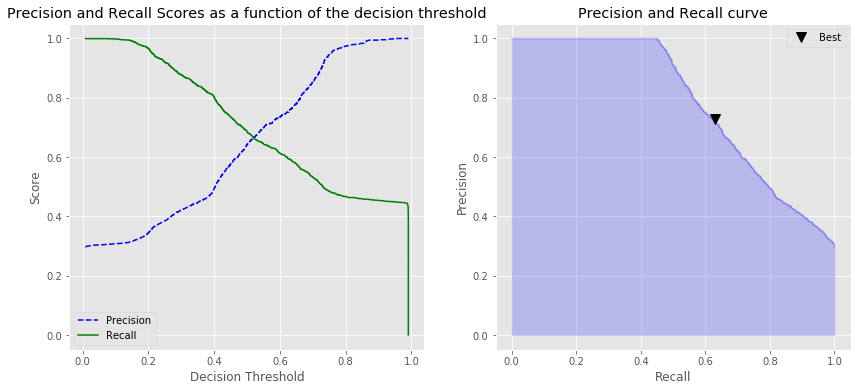

In [40]:
optimize_thresholds_precision_recall("Deep Learning Classifier", model, X_test, y_test)

A ROC (Receiver Operating Characteristic) curve is a diagnostic plot that evaluates a set of probability predictions made by a model on a test dataset using a set of different thresholds. The true positive rate and the false positive rate of the predictions are plotted in a line of increasing thresholds to create a curve. 

A random classifier is presented by a diagonal line on the plot from the bottom-left to top-right indicates the “curve” for a no-skill classifier (predicts the majority class in all cases).

The trade-off in the true-positive rate and false-positive rate for different thresholds is clearly represented in ROC curve. The area under the ROC Curve (ROC-AUC), provides a single number to summarize the performance of a model based on its general capabilities with a value between 0.5 (no-skill) and 1.0 (perfect skill).

A balance between false positive and true positive rates can be acheived by using an optimal threshold on the curve that is closest to the top-left of the plot. Following is one approach to identify the optimal threshold:

Sensitivity = TruePositive / (TruePositive + FalseNegative)
Specificity = TrueNegative / (FalsePositive + TrueNegative)

Where:

Sensitivity = True Positive Rate
Specificity = 1 – False Positive Rate

The Geometric Mean or G-Mean is a metric for imbalanced classification that, if optimized, will find a balance between the sensitivity and the specificity.

G-Mean = sqrt(Sensitivity * Specificity)

One approach would be to test the model with each threshold returned from the call roc_auc_score() and select the threshold with the largest G-Mean value. Given that we have already calculated the Sensitivity (TPR) and the complement to the Specificity when we calculated the ROC Curve, we can calculate the G-Mean for each threshold directly

In [41]:
def optimize_thresholds_roc(model_name, model, X_test, y_test):
    y_scores = model.predict_proba(X_test)
    #precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

    """
    plots the roc curve and shows the corresponding value for thresholds with closest point to the perfect predictor.
    """
    
    # plot the curve
    plt.figure(figsize=(6,6))
    plt.title("ROC Curve")
    fpr, tpr, roc_thresholds = roc_curve(y_test, y_scores)
    plt.plot(fpr, tpr, linewidth=2, label=str(model_name) + ', AUC = %0.4f' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

    plt.legend(loc='best')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Recall)')

    # calculate the g-mean for each threshold
    gmeans = np.sqrt(tpr * (1-fpr))
    # locate the index of the largest g-mean
    ix = np.argmax(gmeans)
    print('Best Threshold=%f, G-Mean=%.3f' % (roc_thresholds[ix], gmeans[ix]))
    # plot the roc curve for the model
    plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')    
    
    # generate new class predictions based on the adjusted_classes
    # function above and view the resulting confusion matrix.
    y_pred_adj = adjusted_classes(y_scores, roc_thresholds[ix])
    model_report("adjusted_classes", y_test, y_pred_adj)

Best Threshold=0.421274, G-Mean=0.802


 Consumer Default Prediction using adjusted_classes



,Predcited: No,Predcited: Yes
Actual: No,TN = 5286,FP = 1047
Actual: Yes,FN = 361,TP = 1211


,precision,recall,f1-score,support
Fully Paid,0.936072,0.834676,0.882471,6333.0
Consumer Default,0.536315,0.770356,0.632376,1572.0
avg/Total,0.856576,0.821885,0.832737,7905.0


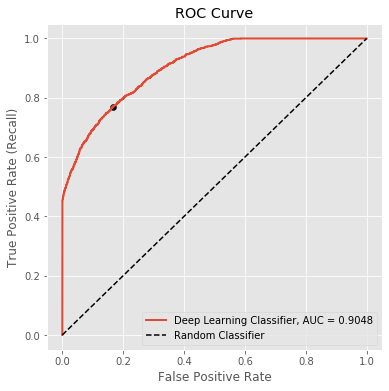

In [42]:
optimize_thresholds_roc("Deep Learning Classifier", model, X_test, y_test)

<a name="Section-8:-Model-Optimization"></a>
# Section 8: Model Optimization

Different choices for activation kernel can be investigated for its influence on the model perfromance and the value of the dropout can be optimized as well. A grid search was used to automate the process of identifying optimized activation kernel and also hyper parameters including dropout rate and weight constrain. The very same structure can be used to optimized other parameters of the model including choice of optimizers and learning rate. 

In [43]:
scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score),
    'f1_score': make_scorer(f1_score)
}

The scoring argument is a dictionary enables us to score different models based on precision_score, recall_score, accuracy_score, and f1_score.

The following function uses GridSearchCV to fit multiple models according to the combinations of parameters in the param_grid. The scores from scorers are recorded and will be printed in a table format. The best model (based on the defined score) will be selected and "refit" to the full training data. Also, the confusion matrix in both table format and graphical format is presented using the held out X_test to show performance.


In [44]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
def grid_search_wrapper(model, refit_score='precision_score'):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """
    grid_search = GridSearchCV(estimator=model, 
                    param_grid=param_grid, 
                    scoring=scorers, 
                    refit=refit_score,
                    return_train_score=True,
                    n_jobs=-1, 
                    cv=3)

    grid_search.fit(X_train, y_train)
    
    results = pd.DataFrame(grid_search.cv_results_)
    results = results.sort_values(by=('mean_test_' + refit_score), ascending=False)

    list_param = list(param_grid.keys())
    columns = ['mean_test_precision_score', 'mean_test_recall_score', 'mean_test_f1_score'] + [('param_' + str) for str in list_param]
    results[columns].round(3).head()
    display(HTML((results[columns].round(3).head()).to_html()))

    # make the predictions
    y_pred = grid_search.predict(X_test)

    print('Best params for {}'.format(refit_score))
    print(grid_search.best_params_)

    # confusion matrix on the test data.
    model_report("Best of GridSearchCV", y_test, y_pred)
    #tile_plot_confusion_matrix(y_test, predictions, class_names)
    return grid_search

In [45]:
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm


def create_model(activation='relu',dropout_rate=0.2, weight_constraint=0):
    # create model
    model_base = Sequential()
    model_base.add(Dense(256, activation=activation, kernel_constraint=maxnorm(weight_constraint)))
    model_base.add(Dropout(dropout_rate))

    # hidden layer
    model_base.add(Dense(128, activation=activation, kernel_constraint=maxnorm(weight_constraint)))
    model_base.add(Dropout(dropout_rate))

    # hidden layer
    model_base.add(Dense(64, activation=activation, kernel_constraint=maxnorm(weight_constraint)))
    model_base.add(Dropout(dropout_rate))

    # output layer
    model_base.add(Dense(units=1,activation='sigmoid'))
    # Compile model
    model_base.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])
    return model_base


# create model
model_base = KerasClassifier(build_fn=create_model, epochs=50, batch_size=256, verbose=0, class_weight=class_weight,validation_data=(X_test, y_test))


In [46]:
# define the grid search parameters
activation = ['relu', 'tanh']
dropout_rate = [0.2, 0.3, 0.4, 0.5]
weight_constraint = [1, 2, 3, 4]


param_grid = dict(activation=activation, dropout_rate=dropout_rate, weight_constraint=weight_constraint)

In [47]:
grid_search_wrapper(model_base, refit_score='f1_score')

,mean_test_precision_score,mean_test_recall_score,mean_test_f1_score,param_activation,param_dropout_rate,param_weight_constraint
26,0.517,0.774,0.618,tanh,0.4,3
27,0.509,0.781,0.614,tanh,0.4,4
31,0.504,0.784,0.612,tanh,0.5,4
16,0.508,0.775,0.611,tanh,0.2,1
28,0.501,0.786,0.609,tanh,0.5,1


Best params for f1_score
{'activation': 'tanh', 'dropout_rate': 0.4, 'weight_constraint': 3}


 Consumer Default Prediction using Best of GridSearchCV



,Predcited: No,Predcited: Yes
Actual: No,TN = 5241,FP = 1092
Actual: Yes,FN = 337,TP = 1235


,precision,recall,f1-score,support
Fully Paid,0.939584,0.827570,0.880027,6333.0
Consumer Default,0.530726,0.785623,0.633496,1572.0
avg/Total,0.858278,0.819228,0.831001,7905.0


GridSearchCV(cv=3, error_score=nan,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x000001BBEA7F8188>,
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh'],
                         'dropout_rate': [0.2, 0.3, 0.4, 0.5],
                         'weight_constraint': [1, 2, 3, 4]},
             pre_dispatch='2*n_jobs', refit='f1_score', return_train_score=True,
             scoring={'accuracy_score': make_scorer(accuracy_score),
                      'f1_score': make_scorer(f1_score),
                      'precision_score': make_scorer(precision_score),
                      'recall_score': make_scorer(recall_score)},
             verbose=0)

<a name="Section-10:-Comparison-with-Previously-Investigated-Classifier"></a>
# Section 10: Comparison with Previously Investigated Classifier

This section is about a comparison of current ANN with investigated classifiers in previous project. Their performance in terms of F1-score are compared and presented in a box plot format.    

Please find complete discerption of previous project from the following link:


[Comprehensive Evaluation of Machine Learning Techniques to Predict Customer Default](https://github.com/majid-hosseini/Machine-Learning-Techniques-to-Predict-Customer-Default)

In [62]:
from sklearn.ensemble import RandomForestClassifier
grid_search_ran_forest = RandomForestClassifier(min_samples_split= 10, 
    max_depth = 5,
    max_features = 5,
    class_weight = 'balanced')

In [63]:
from xgboost import XGBClassifier
grid_search_XGBClassifier = XGBClassifier(n_estimators = 300,
                                          max_depth = 5,
                                          eval_metric = 'mlogloss')
                                          

In [64]:
from sklearn.naive_bayes import GaussianNB
bayes_class = GaussianNB()

In [73]:
def create_model():
    # create model
    model = Sequential()

    # input layer
    model.add(Dense(256, activation='tanh'))
    model.add(Dropout(0.3))

    # hidden layer
    model.add(Dense(128, activation='tanh'))
    model.add(Dropout(0.3))

    # hidden layer
    model.add(Dense(64, activation='tanh'))
    model.add(Dropout(0.3))

    # output layer
    model.add(Dense(units=1,activation='sigmoid'))

    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [87]:
def create_model():
    # create model
    model = Sequential()

    # input layer
    model.add(Dense(256, activation='tanh', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.4))

    # hidden layer
    model.add(Dense(128, activation='tanh', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.4))

    # hidden layer
    model.add(Dense(64, activation='tanh', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.4))

    # output layer
    model.add(Dense(units=1,activation='sigmoid'))

    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [88]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from matplotlib import pyplot

# get a list of models to evaluate
def get_models():
    models = dict()
    models['Artificial Neural Network'] = KerasClassifier(build_fn=create_model, epochs=50, batch_size=256, verbose=0, class_weight=class_weight,validation_data=(X_test, y_test))
    #models['Artificial Neural Network'] = KerasClassifier(build_fn=create_model, epochs=80, batch_size=256, verbose=0, class_weight=class_weight,validation_data=(X_test, y_test))
    models['Random Forest'] = grid_search_ran_forest
    models['Extreme Gradient Boost'] = grid_search_XGBClassifier
    models['Naive Bayes Classifier'] = bayes_class
    return models


In [89]:
# evaluate a given model using cross-validation
def evaluate_model(models, X, y, scoring):
    cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=4, random_state=1)
    scores = cross_val_score(models, X, y, scoring=scoring, cv=cv)
    return scores

In [90]:
def models_comparison(scoring='f1'):
    # get the models to evaluate
    models = get_models()
    # evaluate the models and store results
    results, names = list(), list()
    for name, model_tmp in models.items():
        scores = evaluate_model(model_tmp, X_test, y_test, scoring=scoring)
        results.append(scores)
        names.append(name)
        print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
    return names, results


>Artificial Neural Network 0.611 (0.014)
>Random Forest 0.592 (0.011)
>Extreme Gradient Boost 0.627 (0.022)
>Naive Bayes Classifier 0.625 (0.018)


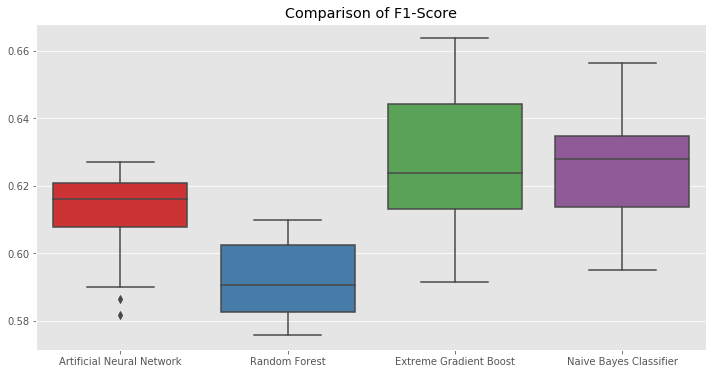

In [91]:
names, results = models_comparison(scoring='f1')
# plot model performance for comparison
pyplot.figure(figsize=(12,6))
pyplot.title("Comparison of F1-Score")
sns.boxplot(x=names, y= results,palette='Set1')
pyplot.show()

Please note that a compelte optimiziation of Artificial Neural Network (ANN) invovle tuning of so many parameters including optimiziers and learning rate which has not been conducted here. 

The developed grid search functions in following section can be easily extended to tune further parameters:
[Section 8: Influence of Activation Kernel](#Section-8:-Influence-of-Activation-Kernel)